# QUESTION:
    
    CAR PRICE PREDICTION WITH MACHINE LEARNING
    
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.


# STEPS :-
    
Data collection:

    Gather a comprehensive dataset containing information about various car features and their corresponding prices. 
    This dataset should include attributes such as make, car_ID, symboling, CarName, fueltype, aspiration, doornumber,
    carbody, drivewheel, enginelocation, wheelbase and any other relevant information.

Data preprocessing: 

    Clean and preprocess the collected data to handle missing values, outliers, and inconsistencies. 
    Perform tasks such as data normalization, one-hot encoding categorical variables,
    and feature scaling to prepare the dataset for training.

Feature engineering:

    Extract relevant features from the existing dataset or create new features that might have a correlation with car prices.
    For example, you could derive features like age of the car, average annual mileage, fueltype, aspiration
    or a combination of multiple features to enhance the model's predictive power.

Splitting the dataset:

    Divide the dataset into training and testing sets. The training set will be used to train the machine learning model,
    while the testing set will be used to evaluate the model's performance.

Model selection: 

    Choose an appropriate machine learning algorithm for regression tasks. Some popular choices include linear regression,
    decision trees, random forests, support vector regression, or gradient boosting algorithms like XGBoost or LightGBM.
    Consider the characteristics of your dataset and the complexity of the problem to select the most suitable algorithm.

Model training: 

    Train the chosen machine learning model on the training dataset.
    The model will learn the relationships between the car features and their corresponding prices.
    
Model evaluation:

    Evaluate the trained model's performance using appropriate evaluation metrics such as mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), or R-squared score. These metrics will help you assess
    how well the model predicts car prices.



Model deployment:

    Once you are satisfied with the model's performance, you can deploy it to predict car prices on new, unseen data.
    This can be done through a web application, API, or any other suitable method for your specific use case.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# DATA COLLECTION

In [2]:
d=pd.read_csv("car.csv")

In [3]:
d

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
d.shape

(205, 26)

In [5]:
d.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# DATA PREPROCCESING

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Correlation betweeen the columns of our dataset')

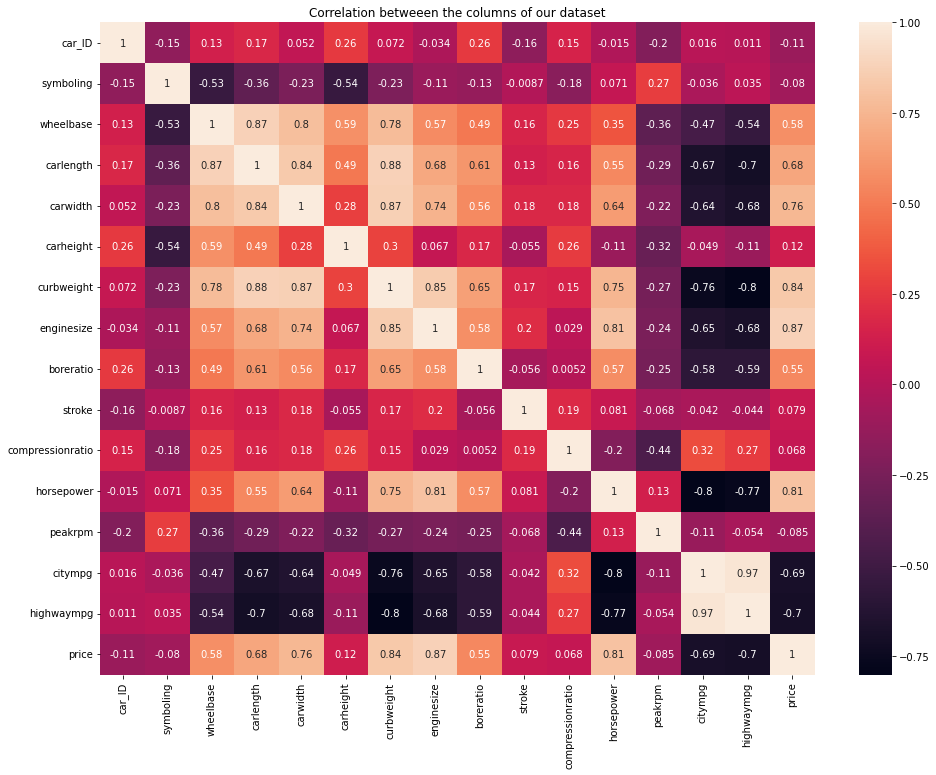

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(d.corr(),annot=True)
plt.title("Correlation betweeen the columns of our dataset")

# SPILTING THE DATASET

In [8]:
x= d.drop(["price","CarName","fueltype","car_ID","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"],axis=1)
y= d["price"].values


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x-train :",x_train.shape)
print("x-test :",x_test.shape)
print("y-train :",y_train.shape)
print("y-test :",y_test.shape)


x-train : (153, 14)
x-test : (52, 14)
y-train : (153,)
y-test : (52,)


# MODEL SELECTION

In [10]:
from sklearn.linear_model import LinearRegression 
model =LinearRegression() 


LinearRegression()

# MODEL TRAINING

In [ ]:
model.fit(x_train,y_train)

In [11]:
pred=model.predict(x_test)

# MODEL EVALUATION

In [12]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MSE", (metrics.mean_squared_error (pred,y_test)))

print("HAE ",(metrics.mean_absolute_error(pred,y_test))) 
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE 12778023.312240593
HAE  2539.741611561819
R2 Score :  0.7961095379581444


In [13]:
x_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.390,8.00,182,5400,16,22
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22
100,0,97.2,173.4,65.2,54.7,2302,120,3.33,3.470,8.50,97,5200,27,34
132,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.070,9.31,110,5250,21,28
68,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.640,21.50,123,4350,22,25
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.290,9.40,69,5200,31,37
159,0,95.7,166.3,64.4,52.8,2275,110,3.27,3.350,22.50,56,4500,38,47
162,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.030,9.00,70,4800,28,34
147,0,97.0,173.5,65.4,53.0,2455,108,3.62,2.640,9.00,94,5200,25,31
182,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.400,23.00,52,4800,37,46


# MODEL DEPLOYMENT

In [14]:
pred2 = model.predict([[0,58.6,128.8,90.1,23.8,5548,130,2.47,1.68,7,211,6600,31,17]])
pred2.round(2)

array([25313.2])